In [25]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import torchvision

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [30]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.Resize((28, 28)),
                                      transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.9, 1.1)),
                                      transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [31]:
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=train_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



In [32]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [37]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print('Labels: ', labels)
print('Batch shape: ', images.size())
images[0].data.shape
print(images.data.min())
print(images.data.max())
print(images.data.mean())
print(images.data.std())

Labels:  tensor([9, 4, 9, 0, 9, 4, 6, 2, 9, 1, 1, 5, 7, 9, 2, 3, 9, 6, 2, 6, 7, 3, 0, 0,
        2, 6, 3, 9, 9, 4, 6, 3, 4, 0, 0, 7, 3, 4, 4, 2, 1, 8, 5, 4, 1, 5, 1, 2,
        0, 9, 5, 0, 8, 4, 4, 0, 6, 5, 8, 9, 1, 9, 1, 7])
Batch shape:  torch.Size([64, 1, 28, 28])
tensor(-0.4242)
tensor(2.8215)
tensor(0.0159)
tensor(0.9992)


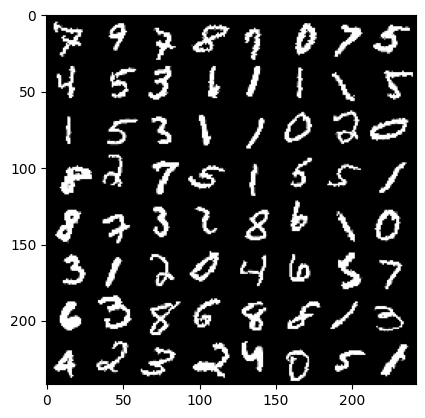

In [35]:
classes = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

show_batch(images)

9


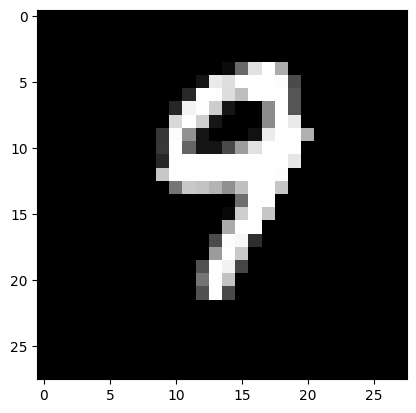

In [36]:
print(classes[labels[1]])
plt.imshow(images[1].numpy().squeeze(), cmap='gray')